In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Загрузка
df = pd.read_csv("Series/international-airline-passengers.csv")  # нестационарный ряд

df_stationary = pd.read_csv("Series/daily-total-female-births-in-cal.csv")  # стационарный ряд





##### Нестационарный ряд #####

=== MA ===
MA (window=2): RMSE=26.2457, MAE=22.3621
MA (window=3): RMSE=44.0415, MAE=37.2759
MA (window=4): RMSE=57.5501, MAE=48.7500
MA (window=5): RMSE=66.5857, MAE=56.6966
MA (window=6): RMSE=71.8086, MAE=61.9828
MA (window=7): RMSE=74.9973, MAE=64.9015
MA (window=8): RMSE=76.5938, MAE=65.1466
MA (window=9): RMSE=77.3375, MAE=64.0805
MA (window=10): RMSE=76.9452, MAE=61.5103
MA (window=11): RMSE=75.1062, MAE=58.5298
MA (window=12): RMSE=71.8184, MAE=54.9626
MA (window=13): RMSE=67.9175, MAE=51.4828
MA (window=14): RMSE=65.8783, MAE=49.0517
MA (window=15): RMSE=66.4073, MAE=49.2805
MA (window=16): RMSE=68.7771, MAE=51.3513
MA (window=17): RMSE=71.5607, MAE=54.5801
MA (window=18): RMSE=74.0407, MAE=56.9655
MA (window=19): RMSE=76.3018, MAE=58.7858
MA (window=20): RMSE=78.1438, MAE=59.7086
→ Best MA: window=2, RMSE=26.2457

=== EMA ===
EMA (window=2): RMSE=20.1145, MAE=17.0441
EMA (window=3): RMSE=32.8137, MAE=27.9340
EMA (window=4): RMSE=41.3443, MAE=

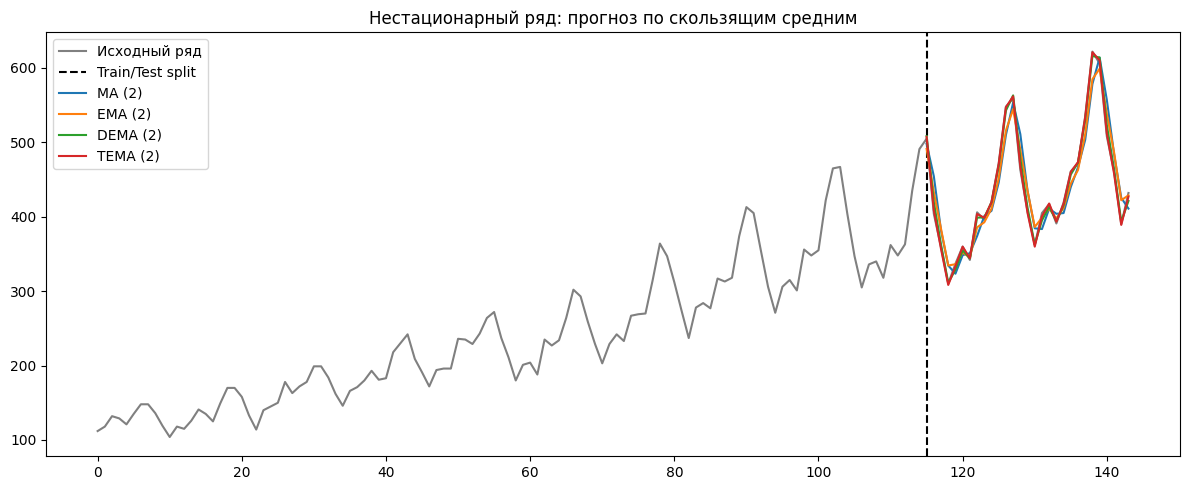



##### Стационарный ряд #####

=== MA ===
MA (window=2): RMSE=3.8495, MAE=3.1027
MA (window=3): RMSE=4.6316, MAE=3.7443
MA (window=4): RMSE=5.0343, MAE=4.1644
MA (window=5): RMSE=5.3190, MAE=4.4959
MA (window=6): RMSE=5.5917, MAE=4.7374
MA (window=7): RMSE=5.8043, MAE=4.8415
MA (window=8): RMSE=5.9442, MAE=4.9521
MA (window=9): RMSE=6.1534, MAE=5.1050
MA (window=10): RMSE=6.3853, MAE=5.2397
MA (window=11): RMSE=6.5699, MAE=5.3985
MA (window=12): RMSE=6.6579, MAE=5.4589
MA (window=13): RMSE=6.7534, MAE=5.5111
MA (window=14): RMSE=6.7807, MAE=5.5029
MA (window=15): RMSE=6.7696, MAE=5.4840
MA (window=16): RMSE=6.6946, MAE=5.4101
MA (window=17): RMSE=6.6770, MAE=5.4134
MA (window=18): RMSE=6.6709, MAE=5.3973
MA (window=19): RMSE=6.6041, MAE=5.3497
MA (window=20): RMSE=6.5435, MAE=5.2973
→ Best MA: window=2, RMSE=3.8495

=== EMA ===
EMA (window=2): RMSE=2.2831, MAE=1.8529
EMA (window=3): RMSE=3.3036, MAE=2.6997
EMA (window=4): RMSE=3.9204, MAE=3.2307
EMA (window=5): RMSE=4.3489, MAE=3.6078

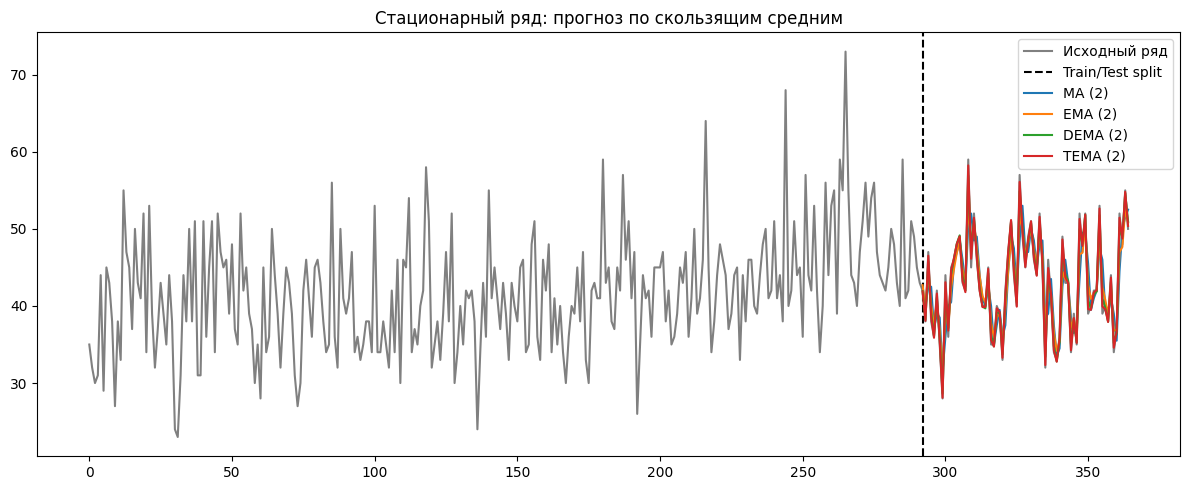

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Метрики
def evaluate(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Скользящие средние
def moving_average(series, window):
    return series.rolling(window=window).mean()

def exponential_moving_average(series, span):
    return series.ewm(span=span, adjust=False).mean()

def double_exponential_moving_average(series, span):
    ema = exponential_moving_average(series, span)
    ema_ema = exponential_moving_average(ema, span)
    return 2 * ema - ema_ema

def triple_exponential_moving_average(series, span):
    ema = exponential_moving_average(series, span)
    ema_ema = exponential_moving_average(ema, span)
    ema_ema_ema = exponential_moving_average(ema_ema, span)
    return 3 * ema - 3 * ema_ema + ema_ema_ema

# Запуск модели
def run_models(series, model_name, model_func, param_range, test):
    print(f"\n=== {model_name} ===")
    best_rmse = float('inf')
    best_param = None
    best_forecast = None

    for param in param_range:
        forecast = model_func(series, param)
        pred = forecast[-len(test):]
        truth = test.values

        if np.isnan(pred).any():
            continue

        mae, mse, rmse = evaluate(truth, pred)
        print(f"{model_name} (window={param}): RMSE={rmse:.4f}, MAE={mae:.4f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_param = param
            best_forecast = forecast

    print(f"→ Best {model_name}: window={best_param}, RMSE={best_rmse:.4f}")
    return best_forecast, best_param

# Загрузка данных
df_ns = pd.read_csv("Series/international-airline-passengers.csv")
series_ns = df_ns.iloc[:, 1].dropna().reset_index(drop=True)

df_s = pd.read_csv("Series/daily-total-female-births-in-cal.csv")
series_s = df_s.iloc[:, 1].dropna().reset_index(drop=True)

# Обработка каждого ряда
for label, series in [("Нестационарный", series_ns), ("Стационарный", series_s)]:
    print(f"\n\n##### {label} ряд #####")
    series = pd.Series(series)

    # Train/Test split
    train_size = int(len(series) * 0.8)
    train = series[:train_size]
    test = series[train_size:]
    full_series = pd.concat([train, test], ignore_index=True)

    # MA
    ma_forecast, ma_best = run_models(full_series, "MA", moving_average, range(2, 21), test)

    # EMA
    ema_forecast, ema_best = run_models(full_series, "EMA", exponential_moving_average, range(2, 21), test)

    # DEMA
    dema_forecast, dema_best = run_models(full_series, "DEMA", double_exponential_moving_average, range(2, 21), test)

    # TEMA
    tema_forecast, tema_best = run_models(full_series, "TEMA", triple_exponential_moving_average, range(2, 21), test)

    # Визуализация
    plt.figure(figsize=(12, 5))
    plt.plot(series.index, series, label="Исходный ряд", color='gray')
    plt.axvline(train_size, color='black', linestyle='--', label='Train/Test split')

    if ma_forecast is not None:
        plt.plot(test.index, ma_forecast[-len(test):], label=f"MA ({ma_best})")
    if ema_forecast is not None:
        plt.plot(test.index, ema_forecast[-len(test):], label=f"EMA ({ema_best})")
    if dema_forecast is not None:
        plt.plot(test.index, dema_forecast[-len(test):], label=f"DEMA ({dema_best})")
    if tema_forecast is not None:
        plt.plot(test.index, tema_forecast[-len(test):], label=f"TEMA ({tema_best})")

    plt.title(f"{label} ряд: прогноз по скользящим средним")
    plt.legend()
    plt.tight_layout()
    plt.show()


🧪 Итоги эксперимента

✅ Нестационарный ряд
Файл: international-airline-passengers.csv

| Модель | Лучшая RMSE | Параметр (окно) |
| ------ | ----------- | --------------- |
| MA     | 26.25       | 2               |
| EMA    | 20.11       | 2               |
| DEMA   | 6.91        | 2               |
| TEMA   | ✅ **2.66** | **2**           |


➡️ Вывод:
Для нестационарного ряда наилучший результат показала модель TEMA (Triple Exponential Moving Average) с окном 2.
Она наиболее эффективно учитывает тренды и адаптируется к резким изменениям, что особенно полезно для нестационарных временных рядов.

✅ Стационарный ряд
Файл: daily-total-female-births-in-cal.csv

| Модель | Лучшая RMSE | Параметр (окно) |
| ------ | ----------- | --------------- |
| MA     | 3.85        | 2               |
| EMA    | 2.28        | 2               |
| DEMA   | 1.01        | 2               |
| TEMA   | ✅ **0.47** | **2**           |


➡️ Вывод:
Для стационарного ряда также лучшей оказалась модель TEMA.
Несмотря на стационарность, TEMA эффективно устраняет шумы и краткосрочные флуктуации, что даёт наиболее точный прогноз.

📌 Финальный вывод
TEMA является оптимальной моделью для обоих типов рядов.

Окно 2 оказалось наиболее эффективным во всех случаях.

Результаты подтверждаются метрикой RMSE, которая была минимальной у TEMA по сравнению с MA, EMA и DEMA.

